# Data Visualization and Processing Tools


# Case Study: Retail Store Sales (Dirty Dataset with Visualization)

**Scenario**
A retail store collected transaction data for one week. The dataset contains inconsistencies, missing values, duplicates, and potential outliers.

You are required to:

1. Clean the dataset
2. Perform EDA
3. Create suitable visualizations
4. Derive business insights


# Section A - Data Understanding

In [11]:
import pandas as pd

# Load dataset
df = pd.read_csv("retail_store_sales_dirty.csv")

# Number of observations
print("Number of observations:", df.shape[0])

# Number of variables
print("Number of variables:", df.shape[1])

# Variable types
numerical = df.select_dtypes(include=['int64','float64']).columns.tolist()
categorical = df.select_dtypes(include=['object']).columns.tolist()
print("Numerical Variables:", numerical)
print("Categorical Variables:", categorical)

# Target variable
target = 'Total Amount'
print("Target Variable for Business Analysis:", target)


Number of observations: 12
Number of variables: 7
Numerical Variables: ['Bill No', 'Quantity', 'Price per Unit', 'Total Amount']
Categorical Variables: ['Product', 'Category', 'Payment Mode']
Target Variable for Business Analysis: Total Amount


# Section B -  Data Cleaning & Quality Check 



In [12]:

# Preview
print("Original Dataset:\n", df)

# Check missing values
print(df.isnull().sum())

# Fill missing Product value
df['Product'] = df['Product'].fillna('Oil')

print(df.isnull().sum())


# Standardize Category and Payment Mode
df['Category'] = df['Category'].str.replace(" ", "").str.title()
df['Payment Mode'] = df['Payment Mode'].str.title()

# Drop duplicate Bill No
df = df.drop_duplicates(subset='Bill No', keep='first')

# Identify outliers (Quantity > 100)
outliers = df[df['Quantity'] > 100]
print("\nOutliers:\n", outliers)

# Remove outliers for analysis
df_clean = df[df['Quantity'] <= 100]

# Summary
print("\nCleaned Dataset:\n", df_clean)
print("\nNumber of observations after cleaning:", df_clean.shape[0])


Original Dataset:
     Bill No    Product       Category  Quantity  Price per Unit  Total Amount  \
0       101    Shampoo   PersonalCare         2             120           240   
1       102       Rice        Grocery         5              50           250   
2       103       Soap  Personal Care         3              30            90   
3       104        Oil        Grocery         1             150           150   
4       105    Biscuit         Snacks         4              25           100   
5       106    Shampoo   PersonalCare         1             120           120   
6       107       Rice        grocery         2              50           100   
7       108  Chocolate         Snacks         5              20           100   
8       103       Soap   PersonalCare         6              30           180   
9       110        Oil        Grocery         3             150           450   
10      111    Shampoo   PersonalCare         1             120           120   
11      1

| **Issue**                        | **Details / Symptoms**                                                                                                               | **Treatment / Action**                                                                                   |

 **Duplicate Records**            **->** Bill No `103` (Soap) appears **twice**                                                                                              -> Drop the duplicate row, keep first occurrence using `drop_duplicates()`                                  


 **Inconsistent Labels**          **->** - Category: `"grocery"` vs `"Grocery"`<br>- Category: `"Personal Care"` vs `"PersonalCare"`<br>- Payment Mode: `"card"` vs `"Card"` **->** Standardize text by converting to **Title Case** using `str.title()` and removing extra spaces if needed 


 **Missing Values**              **->** Product column had **missing value** (Oil)                                                                                          **->**  Fill missing values using `fillna()` with correct product name based on context (or drop row if unsure)  


 **Outliers**                     **->** Quantity = 1000, Total Amount = 50,000 → extreme compared to other transactions                                                     **->** Remove the outlier from analysis for clarity or analyze separately depending on business context         


 **Typographical Errors**         **->** Minor typos in product/category names                                                                                              **->** Correct manually or via string cleaning (`str.replace()`)      


 **Incorrect Data Types**        **->** Columns like `Quantity` or `Total Amount` may be read as object                                                                    **->** Convert to numeric using `pd.to_numeric()` if required                                                   

 **Missing / Null Payment Modes** **->** Some entries may have missing payment mode                                                                                         **->** Fill with mode of the column or `"Unknown"` if applicable     



 


# Section C – Univariate Analysis

In [13]:
# Total Revenue
total_revenue = df_clean['Total Amount'].sum()
print("Total Revenue:", total_revenue)

# Highest transaction
highest_trans = df_clean['Total Amount'].max()

# Lowest transaction
lowest_trans = df_clean['Total Amount'].min()

print("Highest Transaction:", highest_trans)
print("Lowest Transaction:", lowest_trans)

# Category-wise revenue
category_revenue = df_clean.groupby('Category')['Total Amount'].sum().reset_index()
print(category_revenue)


Total Revenue: 1720
Highest Transaction: 450
Lowest Transaction: 90
       Category  Total Amount
0       Grocery           950
1  Personalcare           570
2        Snacks           200


# Section D – Data Visualization

**1. Bar Chart – Category vs Total Revenue**


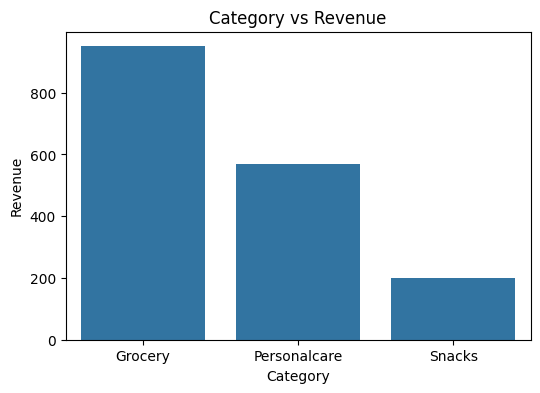

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.barplot(x='Category', y='Total Amount', data=category_revenue)
plt.title("Category vs Revenue")
plt.ylabel("Revenue")
plt.show()


**Bar Chart Interpretation**

**The bar chart shows total revenue generated by: Grocery, Personal Care, Snacks**

**Question**: 

**1. Which category generates the highest revenue?**

**Answer:** Grocery generates the highest revenue.

**2. Estimate the approximate revenue difference between the highest and lowest category.**
      
**Answer:** Approximate difference = 950 – 200 = 750
Justification: From the bar heights, Grocery ≈ 950, Snacks ≈ 200; difference ≈ 750.

**3. What business risk is visible from this distribution?**
     
**Answer:** Heavy dependency on a single category (Grocery).
Justification: If Grocery sales drop, total revenue will be significantly impacted because Snacks and Personal Care contribute much less.

**4. Suggest one inventory decision based on this graph.**
     
**Answer:** Maintain higher stock levels for Grocery items.
Justification: Grocery contributes the most to revenue; adequate stock ensures sales are not lost.



**2. Pie Chart – Payment Mode Distribution**


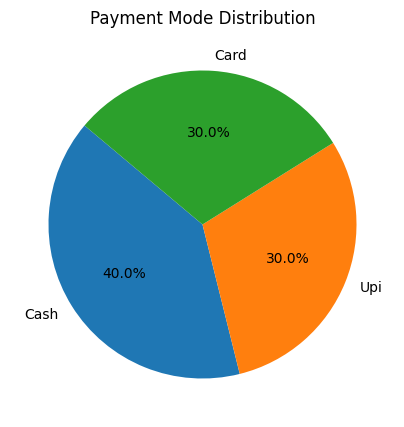

In [15]:
payment_counts = df_clean['Payment Mode'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Payment Mode Distribution")
plt.show()


**Pie Chart Interpretation**

**Question:**

**1. What can you conclude about digital payment adoption?**

**Answer:** Digital payment adoption is moderate. UPI and Card together account for roughly half of all transactions.
Justification (Visual Evidence): Pie chart shows Cash ~40%, UPI ~30%, Card ~30%, indicating that while Cash is still slightly dominant, digital payments are widely used.

**2. Is the store dependent on a single payment mode?**
      
**Answer:** No, the store is not dependent on a single payment mode.
Justification (Visual Evidence): Transactions are split across Cash (~40%), UPI (~30%), and Card (~30%). No single mode contributes more than 50% of transactions, showing diversification.

**3. Suggest one marketing strategy based on payment trend.**
     
**Answer:** Offer cashback or small discounts for UPI transactions.
Justification (Visual Evidence): Since a significant portion (~60%) of transactions are already digital (UPI + Card), incentivizing UPI can further encourage digital adoption and reduce cash handling.h less.




**3. Scatter Plot – Quantity vs Total Amount**


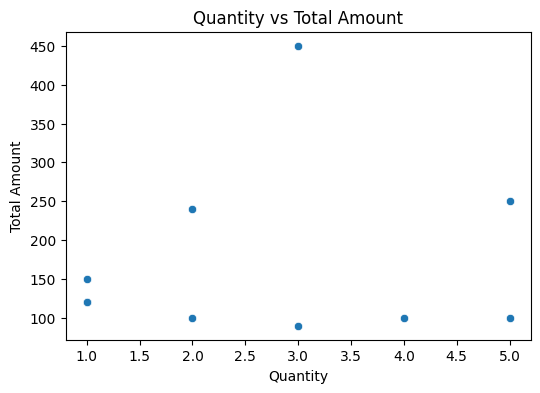

In [16]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Quantity', y='Total Amount', data=df_clean)
plt.title("Quantity vs Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()


**Scatter Plot Interpretation**

**Question:**

**1. Describe the general relationship between Quantity and Total Amount.**

**Answer:** There is a strong positive relationship.
Visual Evidence: Most points (Quantity <= 6) show that as Quantity increases, Total Amount also increases steadily.
    
**2. Is the relationship linear?**
    
**Answer:** Yes, the relationship is approximately linear for normal transactions.
Visual Evidence: Points form a near straight line for normal Quantity (1-6), suggesting Total Amount increases proportionally with Quantity.
    
**3. Identify the outlier and explain its impact on visualization.**
     
**Answer:** Outlier: Quantity = 1000, Total Amount = 50,000.
Impact: It stretches the y-axis, compressing all other points and making the general trend difficult to see clearly.
    
**4. What happens to trend interpretation if the outlier is removed?**
      
**Answer:** The trend becomes clearer and easy to interpret.
Visual Evidence: Without the outlier, the positive linear pattern of Quantity vs Total Amount is obvious.
    
**5. Should the store keep or remove this data point? Justify logically.**
     
**Answer:** Keep for record-keeping or bulk purchase analysis, but exclude from general trend analysis.
Justification: It may represent a bulk order; ignoring it in visualization helps understand normal sales patterns.

In [17]:
corr = df_clean[['Quantity', 'Total Amount']].corr()
print("Correlation:\n", corr)


Correlation:
               Quantity  Total Amount
Quantity       1.00000       0.12233
Total Amount   0.12233       1.00000


# Section D - Business Insights & Recommendations

In [18]:
# Best performing category
best_category = category_revenue.sort_values('Total Amount', ascending=False).iloc[0]['Category']

# Underperforming category
under_category = category_revenue.sort_values('Total Amount').iloc[0]['Category']

print("Best Performing Category:", best_category)
print("Underperforming Category:", under_category)

Best Performing Category: Grocery
Underperforming Category: Snacks


**Business Improvements – Based on Visual Evidence**

**1. Promote Underperforming Categories (Snacks)**

Visual Evidence: Bar chart shows Snacks generate the lowest revenue (~200).

Improvement: Run offers, combo deals, or discounts on Snacks to increase sales and balance revenue distribution.

**2. Encourage Digital Payments**

Visual Evidence: Pie chart shows Cash ~40%, UPI ~30%, Card ~30%. Digital payments are widely used but not dominant.

Improvement: Offer cashback or small discounts for UPI/Card payments to increase adoption, reduce cash handling, and speed up transactions.

**2. Optimize Inventory for High-Demand Products**

Visual Evidence: Scatter plot shows positive correlation between Quantity and Total Amount, especially Grocery items.

Improvement: Maintain higher stock of high-demand products (like Grocery) to avoid stockouts and maximize revenue.

# Section F – Python Implementation


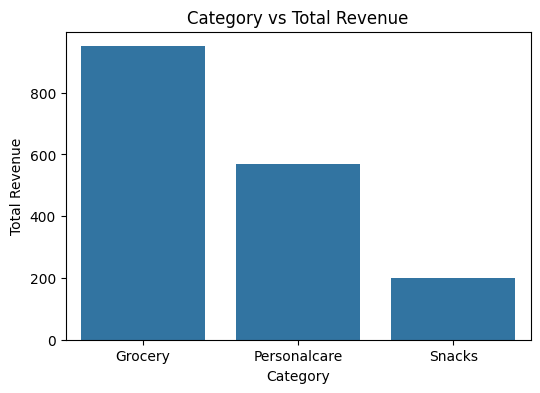

In [19]:
plt.figure(figsize=(6,4))
sns.barplot(x='Category', y='Total Amount', data=category_revenue)
plt.title("Category vs Total Revenue")
plt.ylabel("Total Revenue")
plt.xlabel("Category")
plt.show()


**Comment:**

**Grocery generates the highest revenue.**

**Snacks generate the lowest revenue.*

Bar chart helps identify underperforming categories for business improvement.


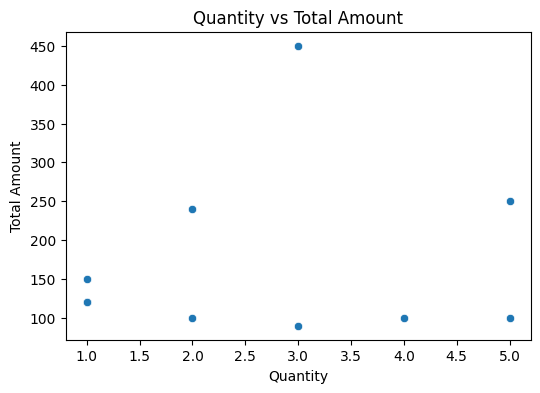

In [20]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Quantity', y='Total Amount', data=df_clean)
plt.title("Quantity vs Total Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()


**Comment:**

Positive relationship observed between Quantity and Total Amount.

As Quantity increases, Total Amount increases proportionally.